In [2]:
import CG_notes
import numpy as np
import numpy.linalg as la
import matplotlib, colorsys
import matplotlib.pyplot as plt
import scipy.linalg as sla
from mpl_toolkits.mplot3d import Axes3D
import sys
sys.path.append('..')
import util, pprint
import optimize
from itertools import chain
%load_ext autoreload
%autoreload 2

In [20]:
import scipy.optimize

In [186]:
A = np.asarray([[4., 0.],[0., 1.]])
b = np.ones(2)
x_true = la.inv(A).dot(b)
x_0 = np.asarray([1., 5.])

In [195]:
def coord_descent(A,b,x_0, tol=1e-3, max_iter=10, dirn=0):
    err = np.inf
    iter = 1
    x = np.copy(x_0)
    n = len(x)
    x_true = la.inv(A).dot(b)
    xs = [x_0]
    def f(x):
        return(0.5*x.T.dot(A.dot(x)) - b.T.dot(x))
    def fprime(x):
        g = A.dot(x) - b
        return g

    while(err > tol and iter < max_iter):
        if dirn==0:
            idx = range(n)
        else:
            idx = range(n-1,-1,-1)
        for k in idx:
            gk = np.zeros(n)
            g = b - A.dot(x)
            gk[k] = g[k]
            alpha, _, _, _, _, _ = scipy.optimize.line_search(f, fprime, x, gk)
            x += alpha*gk
            xs.append(np.copy(x))
        err = la.norm(x-x_true)
        iter += 1
    return x, xs

In [165]:
range(5, -1, -1)

[5, 4, 3, 2, 1, 0]

In [4]:
## solver objects
s_gd = optimize.GradientDescentSolver(A=A,b=b,full_output=True)
s_cg = optimize.ConjugateGradientsSolver(A=A,b=b,full_output=True)

In [197]:
## paths
err = [x_0,x_true]
path_gd = s_gd.path(x_0=x_0)
path_cg = s_cg.path(x_0=x_0)
path_diag1 = [x_0, np.array([x_0[0],x_true[1]]), x_true]
path_diag2 = [x_0, np.array([x_true[0],x_0[1]]), x_true]
_, coord0 = coord_descent(A,b,x_0, dirn=0)
_, coord1 = coord_descent(A,b,x_0, dirn=1)

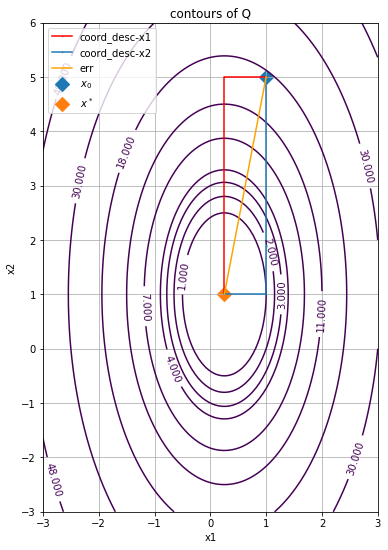

In [198]:
## errors and residuals
x_gd, i_gd, resids_gd, errs_gd = s_gd.solve(x_0=x_0, x_true=x_true)
x_cg, i_cg, resids_cg, errs_cg = s_cg.solve(x_0=x_0, x_true=x_true)

## plotting ================================================================
spanx1 = [-3., 3.]
spanx2 = [-3., 6.]
fig = plt.figure("path", figsize=(la.norm(spanx1,1),la.norm(spanx2,1)))

x1v, x2v, ctrs = CG_notes.calc_contours(A=A,b=b,spanx1=spanx1, spanx2=spanx2)
## plot path and contours
# fig = plt.figure("path")
ax = fig.gca()
ll = np.linspace(10**-10,4,20)
ll = 10**ll
ll = [round(ll[i],0) for i in range(20)]
cs = ax.contour(x1v, x2v, ctrs,levels=ll)
plt.clabel(cs)
plt.xlabel("x1")
plt.ylabel("x2")
# plt.axis('equal')

plt.scatter(x_0[0], x_0[1], marker='D', s=100, label=r"$x_0$") # START POINT
plt.scatter(x_true[0], x_true[1], marker='D', s=100, label=r"$x^*$") # TRUE POINT

# plt.plot([p[0] for p in path_gd], [p[1] for p in path_gd],
#          marker='o', markersize=0.5, color="blue", label="gd")
# plt.plot([p[0] for p in path_cg], [p[1] for p in path_cg],
#          marker='o', markersize=0.5, color="green", label="cg")

plt.plot([p[0] for p in coord0], [p[1] for p in coord0],
     marker='o', markersize=0.5, color="red", label="coord_desc-x1")
plt.plot([p[0] for p in coord1], [p[1] for p in coord1],
     marker='o', markersize=0.5, label="coord_desc-x2")

# plt.plot([p[0] for p in path_diag1], [p[1] for p in path_diag1],
#      marker='o', markersize=0.5, color="red", label="coord-search-1")
# plt.plot([p[0] for p in path_diag2], [p[1] for p in path_diag2],
#      marker='o', markersize=0.5, color="orange", label="coord-search-2")

plt.plot([p[0] for p in err], [p[1] for p in err],
     marker='o', markersize=0.5, color="orange", label="err")
plt.legend()
plt.title("contours of Q")
plt.grid()
plt.show()
name = str(list(chain(*A)))
fig.savefig("plot_"+name+".pdf")

In [179]:


print 

[1, 2, 3, 4]
